# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [85]:
# your code here

import random


def rolling_dice():
    return random.choices(range(1, 7), k=10) #6 angles of the dice, rolling 10 times

dice_rolls = rolling_dice()

dice_df = pd.DataFrame({'Number': dice_rolls})
dice_df.head(10)


,Number
0,5
1,5
2,3
3,4
4,6
5,5
6,5
7,2
8,5
9,6


#### 2.- Plot the results sorted by value.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa5df65f7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa5df65fd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa5df65f520>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa5df68c280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa5df68c520>],
 'means': []}

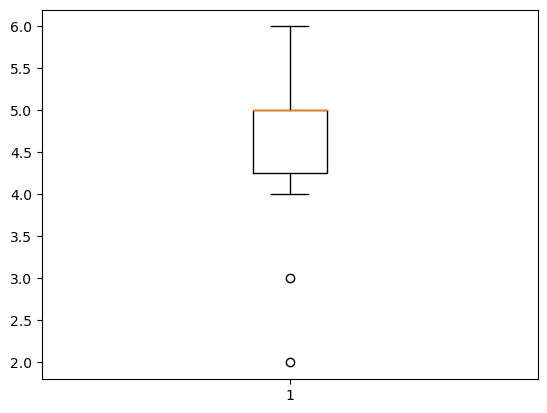

In [91]:
# your code here
sorted_rolls = dice_df['Number'].sort_values()

plt.boxplot(sorted_rolls)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [92]:
#https://stackoverflow.com/questions/41551658/how-to-create-a-frequency-distribution-table-on-given-data-with-python-in-jupyte

#Calculate the freq dist and sort by dice number (index)
frequency_distribution = pd.Series(sorted_rolls).value_counts().sort_index().reset_index()
#Why do we need to reset ?

frequency_distribution.columns = ['Dice number', 'Frequency']

print(frequency_distribution)


   Dice number  Frequency
0            2          1
1            3          1
2            4          1
3            5          5
4            6          2


<Axes: title={'center': 'Frequency distribution - Dice Rolls '}, xlabel='Dice number (x)', ylabel='Frequency (y)'>

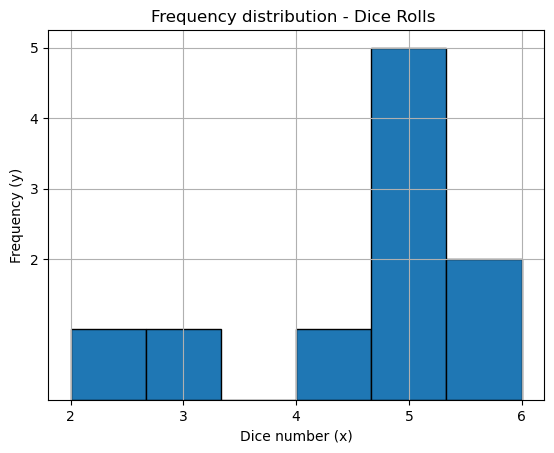

In [136]:
plt.xlabel('Dice number (x)')
plt.ylabel('Frequency (y)')
plt.title('Frequency distribution - Dice Rolls ')

plt.yticks(range(min(sorted_rolls), max(sorted_rolls) + 1))
plt.xticks(range(min(sorted_rolls), max(sorted_rolls) + 1))

sorted_rolls.hist(bins=6, edgecolor='black')

In [ ]:
# What is the relation between this plot and the plot above? 

# We can see that the median is the same on both graphs (5)
# Negatively skewed
# Also they show the same percentiles (develop here)

#Frequency distribution graph is "easier to read" and should be used for data presentation to the stakeholders.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [95]:
# your code here
def calculate_mean(data):
    mean = sum(data)/len(data)
    return mean

print(calculate_mean(dice_rolls))

4.6


In [96]:
#Other method

def mean(data):
    
    total_sum = 0
    len_data = 0
    
    for value in data:
        total_sum += value
        len_data += 1

    mean = total_sum / len_data

    return mean

print(mean(dice_rolls))

4.6


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [97]:
# your code here
frequency_distribution = dice_df.value_counts().sort_index().reset_index() #chaining method
frequency_distribution.columns = ['Dice number', 'Frequency']
print(frequency_distribution)

#Calculate mean by calling function
mean_frequency_distribution = mean(frequency_distribution['Frequency']) 
print(f'Mean is {mean_frequency_distribution}')

# Why the result is not the same as when we calculate the mean ?

   Dice number  Frequency
0            2          1
1            3          1
2            4          1
3            5          5
4            6          2
Mean is 2.0


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [98]:
# Method without function

# your code here

#Convert values into list to calculate the median
values_list = sorted_rolls.to_list()
print(values_list)

print(len(values_list)) #Median = value in the middle 
#If even number, we take the two elements in the list divided by 2

median = (values_list[4] + values_list[5])/2
print(f'Median is {median}')

[2, 3, 4, 5, 5, 5, 5, 5, 6, 6]
10
Median is 5.0


In [99]:
#With function

def median(lst):
    sortedlst = sorted(lst)
    lstlen = len(lst)
    index = (lstlen - 1) // 2
   
    if (lstlen % 2):
        return sortedlst[index] #if total list values is even 
    else:
        return (sortedlst[index] + sortedlst[index + 1])/2.0 #if total list values is odd

#values_list = [2, 2, 2, 4, 4, 4, 4, 5, 6, 6]
calculate_median = median(values_list)
print(f'Median is {calculate_median}')

Median is 5.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [100]:
#Comparing with results given by quantile formula

q1 = np.quantile(values_list, 0.25) 
print("the first quartile is", q1)
q2 = np.quantile(values_list, 0.50)
print("the second quartile is",q2)
q3 = np.quantile(values_list, 0.75)
print("the third quartile is", q3)
q4 = np.quantile(values_list, 1)
print("the fourth quartile is", q4)

the first quartile is 4.25
the second quartile is 5.0
the third quartile is 5.0
the fourth quartile is 6


In [101]:
# Find quartiles 

def quartiles(lst):
    sortedlst = sorted(lst)
    lstlen = len(lst)
    
    middle = len(lst)//2

# lower quartile
    q1_lower_quartile = median(lst[:middle])

# median
    q2 = median(lst)

# upper quartile
    q3_upper_quartile = median(lst[middle:])
    
    return q1_lower_quartile, q2, q3_upper_quartile

#fourth quartile =max value
    q4 = max(lst)
    

q1_lower_quartile, q2, q3_upper_quartile = quartiles(values_list)
print(f'Q1: {q1_lower_quartile:.2f}, Q2: {q2}, Q3: {q3_upper_quartile:.2f}, Q4: {q4:.2f}')

Q1: 4.00, Q2: 5.0, Q3: 5.00, Q4: 6.00


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [138]:
# your code here
roll_dice_df = pd.read_csv('/Users/amandine/Desktop/Ironhack/03_Week/Descriptive-Stats/data/roll_the_dice_hundred.csv')
roll_dice_df.head(10)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa5df3a48e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa5df3a4e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa5df3a4640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa5df3a5360>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa5df3a5600>],
 'means': []}

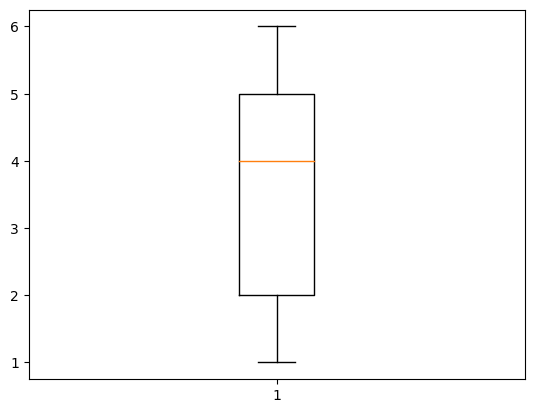

In [84]:
# your code here
sorted_rolls = roll_dice_df['value'].sort_values()

plt.boxplot(sorted_rolls)

In [105]:

#Perfect normal distribution

#IQR (to develop)

#Mean : around 50


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [106]:
# your code here
roll_dice_df['value'] = pd.to_numeric(roll_dice_df['value']) #convert str into numerical values

mean_hundred_dice_rolls = calculate_mean(roll_dice_df['value'])
print(mean_hundred_dice_rolls)

3.74


In [107]:
#Check if value with np.mean is the same :

average = np.mean(roll_dice_df['value'])
print(average)

3.74


#### 3.- Now, calculate the frequency distribution.


In [141]:
# your code here
frequency_distribution = roll_dice_df['value'].value_counts().sort_index().reset_index()

frequency_distribution.columns = ['Dice Number', 'Frequency']

print(frequency_distribution)

   Dice Number  Frequency
0            1         12
1            2         17
2            3         14
3            4         22
4            5         12
5            6         23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

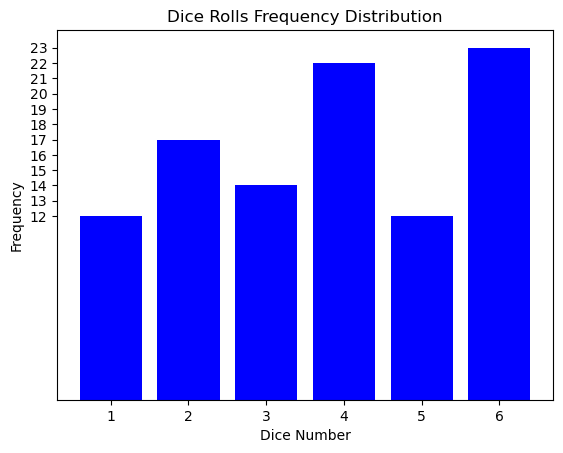

In [146]:
plt.bar(frequency_distribution['Dice Number'], frequency_distribution['Frequency'], color='blue')

plt.ylabel('Frequency')
plt.xlabel('Dice Number')
plt.title('Dice Rolls Frequency Distribution')

plt.yticks(range(min(frequency_distribution['Frequency']), max(frequency_distribution['Frequency']) + 1))
plt.xticks(range(min(frequency_distribution['Dice Number']), max(frequency_distribution['Dice Number']) + 1))

plt.show()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [111]:
# your code here
roll_the_dice_thousand_df = pd.read_csv('/Users/amandine/Desktop/Ironhack/03_Week/Descriptive-Stats/data/roll_the_dice_thousand.csv')
roll_the_dice_thousand_df.head(3)

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1


In [120]:
frequency_distribution = roll_the_dice_thousand_df['value'].value_counts().sort_index().reset_index()
print(frequency_distribution)

   index  value
0      1    175
1      2    167
2      3    175
3      4    168
4      5    149
5      6    166


ValueError: weights should have the same shape as x

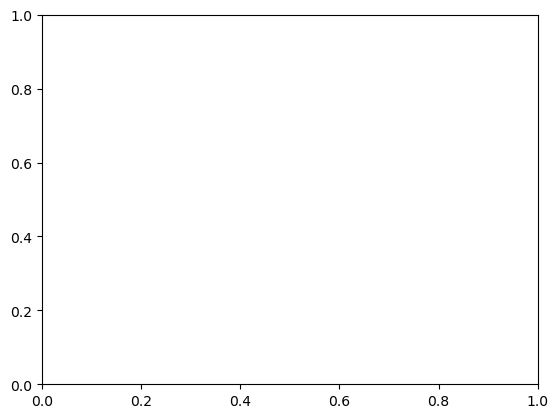

In [121]:
#bins = frequency_distribution_2.index.to_list()

plt.xlabel('Dice Values')
plt.ylabel('Frequency')
plt.title('Dice Rolls Frequency Distribution')

In [ ]:
"""
your comments here
"""


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [250]:
# your code here
ages_population_df = pd.read_csv('/Users/amandine/Desktop/Ironhack/03_Week/Descriptive-Stats/data/ages_population.csv')
ages_population_df.head(10)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
5,27.0
6,39.0
7,12.0
8,42.0
9,33.0


In [251]:
frequency_distribution_3 = ages_population_df['observation'].value_counts().sort_index()
print(frequency_distribution_3)

1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: observation, Length: 72, dtype: int64


Text(0.5, 1.0, 'Ages population')

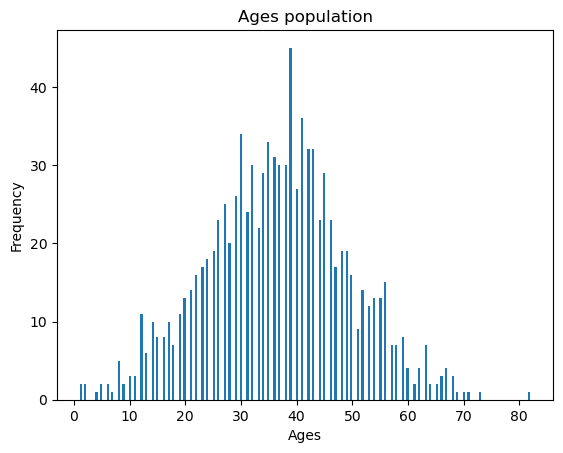

In [263]:
plt.hist(frequency_distribution_3.index, bins=200, weights=frequency_distribution_3.values)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Ages population')

In [264]:
#Mean is generally around the most frequent values, so ages around 40,45
#Data are pretty sparse, so we can expect the standard deviation to be pretty high -> 1,4

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [265]:
# your code here
average = np.mean(frequency_distribution_3)
std_ages = np.std(frequency_distribution_3)

print(f"The average is {average}, and the standard deviation is {std_ages}")

The average is 13.88888888888889, and the standard deviation is 11.183514101315424


In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['Age'], df['Count'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Population Distribution')
plt.show()

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""